In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
print(pd.__version__)
import re
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
from collections import Counter

1.2.4


In [3]:
# Read in gun violence data
gv_df = pd.read_excel('C:/Users/mattg/Desktop/BU_Classes/CS_640/Final_Project/data.xlsx',index_col=0) # Change as needed for individual runs

In [4]:
gv_df.head(1)

,imageID,article_url,headline,body,google_visual_api_web_entities_detection_on_lead_image,automatically_generated_caption_of_lead_image,lead_3_sentences_summary_of_full_article_text,presum_summary_of_full_article_text,Q1 Relevant,Q2 Focus,Q3 Theme1,Q3 Theme2,V1image,V2ethnicity,V3relevance,V4relevance,Q4 Image1,Q4 Image2
index,,,,,,,,,,,,,,,,,,
0,10057,http://beta.latimes.com/nation/la-na-paddock-c...,Cremated remains of Las Vegas mass shooter to ...,"""Cremated remains of Las Vegas mass shooter to...",Stephen Paddock 2017 Las Vegas Strip shooting ...,"Eric Paddock, center, with his brother Eric Pa...","""Cremated remains of Las Vegas mass shooter to...","""cremated remains of las vegas mass shooter to...",1,2,7,99,1,0,0,99.0,6,99


In [5]:
# Changing number labels to text labels for columns relevant to Project 1

q1 = {1: "Yes", 2: "No"}
q2 = {1: "One incident", 2: "Ongoing Issue"}
q3 = {1: "Gun/2nd Amendment", 2: "Gun Control", 3: "Politics", 4: "Mental Health", 5: "School/Public Safety", 6: "Race/Ethnicity", 7: "Public Opinion", 8: "Society/culture", 9: "Economic Consequences", 99: "Other"}
gv_df = gv_df.replace({"Q1 Relevant": q1})
gv_df = gv_df.replace({"Q2 Focus": q2})
gv_df = gv_df.replace({"Q3 Theme1": q3})
gv_df = gv_df.replace({"Q3 Theme2": q3})
gv_df["Q4 Image1"] = gv_df["Q4 Image1"].astype(str)
gv_df["Q4 Image2"] = gv_df["Q4 Image1"].astype(str)

<AxesSubplot:>

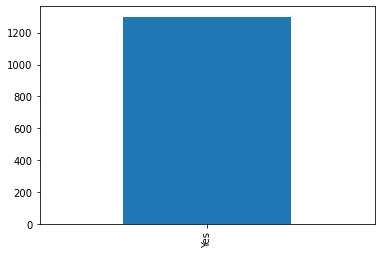

In [6]:
# Plot of if article is about gun violence in the United States (Yes/No)

gv_df['Q1 Relevant'].value_counts().plot(kind='bar')

<AxesSubplot:>

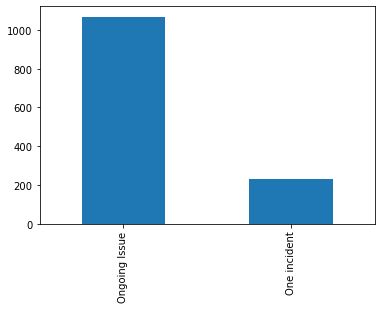

In [7]:
# Plot of the focus of the news story

gv_df['Q2 Focus'].value_counts().plot(kind='bar')

<AxesSubplot:>

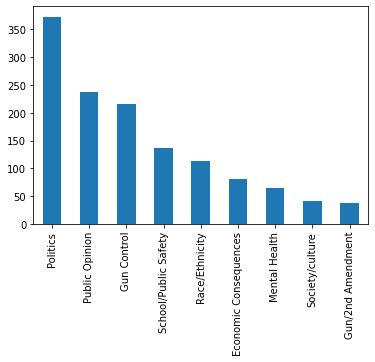

In [8]:
# Plot of the main theme [Q3 Theme1] of each news story

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
#fig.suptitle('Sharing x per column, y per row')
#gv_df['Q1 Relevant'].value_counts().plot(kind='bar')
#gv_df['Q2 Focus'].value_counts().plot(kind='bar')
gv_df['Q3 Theme1'].value_counts().plot(kind='bar')
#gv_df['Q4 Image1'].value_counts().plot(kind='bar')

#for ax in fig.get_axes():
#    ax.label_outer()

<AxesSubplot:>

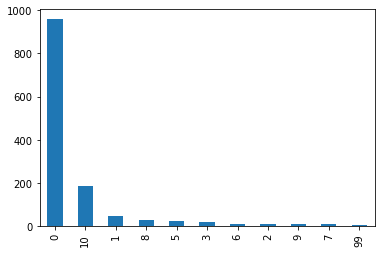

In [9]:
# Plot of scores 0-10 for the extent that the image represents the first theme (Q3-1) of the news story
gv_df['Q4 Image1'].value_counts().plot(kind='bar')

Data's shape is  (1300, 18)

      imageID                                        article_url  \
index                                                              
0       10057  http://beta.latimes.com/nation/la-na-paddock-c...   
1       10073  https://www.yahoo.com/news/florida-shooter-tro...   
2       10107  http://www.chicagotribune.com/suburbs/lake-cou...   
3       10112  http://www.chicagotribune.com/suburbs/post-tri...   
4       10156  http://www.cnn.com/2018/02/16/us/exclusive-sch...   

                                                headline  \
index                                                      
0      Cremated remains of Las Vegas mass shooter to ...   
1      Florida shooter a troubled loner with white su...   
2      Vernon Hills teen accused of wearing white sup...   
3      Griffith student charged with accidentally bri...   
4      Exclusive: Group chat messages show school sho...   

                                                    body  \
index        

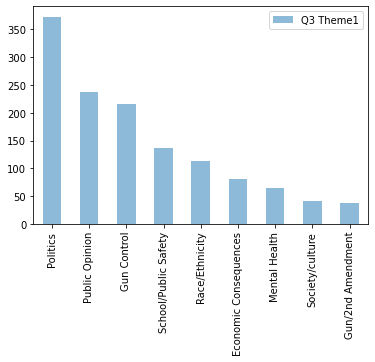

In [10]:
print("Data's shape is ", gv_df.shape)

print()

print(gv_df.head())

print()

print(gv_df.describe())

gv_df['Q3 Theme1'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

In [11]:
# Most common words from headline
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
hlWords = (gv_df.headline.str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split())
hlRslt = pd.DataFrame(Counter(hlWords).most_common(25), columns=['Word', 'Frequency']).set_index('Word')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/justindiemmanuele/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/envs/tf38_640/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/envs/tf38_640/share/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/envs/tf38_640/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [12]:
hlRslt

NameError: name 'hlRslt' is not defined

In [13]:
# Most common words from body
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
bodyWords = (gv_df.body.str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split())
bodyRslt = pd.DataFrame(Counter(bodyWords).most_common(25), columns=['Word', 'Frequency']).set_index('Word')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/justindiemmanuele/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/envs/tf38_640/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/envs/tf38_640/share/nltk_data'
    - '/opt/homebrew/Caskroom/miniforge/base/envs/tf38_640/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [14]:
bodyRslt

NameError: name 'bodyRslt' is not defined

In [15]:
# Strategy 1: Linear Regression Model w/o text parameters
X_train, X_test, Y_train, Y_test = train_test_split(
        gv_df[['Q1 Relevant','Q2 Focus', 'Q3 Theme2', 'V1image', 'V2ethnicity', 'V3relevance', 'V4relevance', 'Q4 Image1','Q4 Image2']],
        gv_df['Q3 Theme1'],
        test_size=1/4.0,
        random_state=0
)

linreg = LinearRegression().fit(X_train, Y_train)
lin_y_preds = linreg.predict(X_test)
print("RMSE on Linear Regression testing set = ", mean_squared_error(Y_test, lin_y_preds))

linreg_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':lin_y_preds})

ValueError: could not convert string to float: 'Yes'

In [16]:
# Sample results of Linear Regression Model
linreg_results

NameError: name 'linreg_results' is not defined

In [17]:
# Strategy 2: Logistic Regression Model w/o text parameters
X_train, X_test, Y_train, Y_test = train_test_split(
        gv_df[['Q1 Relevant','Q2 Focus', 'Q3 Theme2', 'V1image', 'V2ethnicity', 'V3relevance', 'V4relevance', 'Q4 Image1','Q4 Image2']],
        gv_df['Q3 Theme1'],
        test_size=1/4.0,
        random_state=0
)
logreg = LogisticRegression(random_state=0).fit(X_train, Y_train)
log_y_preds = logreg.predict(X_test)
print("RMSE on Logistic Regression testing set = ", mean_squared_error(Y_test, log_y_preds))

logreg_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':log_y_preds})

ValueError: could not convert string to float: 'Yes'

In [18]:
logreg_results

NameError: name 'logreg_results' is not defined

In [19]:
# Strategy 3: Random Forest w/o text parameters
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

gv_df = gv_df.replace([np.inf, -np.inf], np.nan)
gv_df = gv_df.dropna()

X_train, X_test, Y_train, Y_test = train_test_split(gv_df[['Q1 Relevant','Q2 Focus', 'Q3 Theme2', 'V1image', 'V2ethnicity', 'V3relevance', 'V4relevance', 'Q4 Image1','Q4 Image2']],
                                                          gv_df['Q3 Theme1'],
                                                          test_size=1/4.0,
                                                          random_state=0
                                                 )


rfreg = RandomForestRegressor(n_estimators=1000, random_state = 0)
rfreg.fit(X_train, Y_train)
rf_y_preds = rfreg.predict(X_test)

rfresults = pd.DataFrame({'Y_test':Y_test, 'y_preds':y_preds})
print("RMSE on RF testing set = ", mean_squared_error(Y_test, rf_y_preds))

ValueError: could not convert string to float: 'Yes'

In [ ]:
rfresults

In [20]:
svm_hl_results

NameError: name 'svm_hl_results' is not defined

In [21]:
# Strategy 4: SVM on headline parameter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
X_hl = gv_df['headline'].astype(pd.StringDtype())
X_hl = tfidf.fit_transform(X_hl.values.astype('U'))
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_hl,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_hl_y_preds = svm.predict(X_test)

#print("RMSE on SVM body testing set = ", mean_squared_error(Y_test, svm_body_y_preds))
print("Accuracy Score on SVM body testing set = ", accuracy_score(Y_test, svm_hl_y_preds))
svm_hl_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_hl_y_preds})

Accuracy Score on SVM body testing set =  0.7098765432098766


In [22]:
svm_hl_results

,Y_test,y_preds
index,,
940,Public Opinion,Race/Ethnicity
476,Politics,Politics
1032,School/Public Safety,School/Public Safety
241,Politics,Public Opinion
1258,Politics,Public Opinion
...,...,...
82,Mental Health,Race/Ethnicity
514,Politics,Politics
845,Politics,Public Opinion


In [23]:
# Strategy 5: SVM on body parameter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
X_body = gv_df['body'].astype(pd.StringDtype())
X_body = tfidf.fit_transform(X_body.values.astype('U'))
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_body,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_body_y_preds = svm.predict(X_test)

#print("RMSE on SVM body testing set = ", mean_squared_error(Y_test, svm_body_y_preds))
print("Accuracy Score on SVM body testing set = ", accuracy_score(Y_test, svm_body_y_preds))
svm_body_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_body_y_preds})

Accuracy Score on SVM body testing set =  0.6790123456790124


In [24]:
svm_body_results

,Y_test,y_preds
index,,
940,Public Opinion,Public Opinion
476,Politics,Politics
1032,School/Public Safety,School/Public Safety
241,Politics,Politics
1258,Politics,Politics
...,...,...
82,Mental Health,Race/Ethnicity
514,Politics,School/Public Safety
845,Politics,Public Opinion


In [25]:
# Strategy 6: SVM on google_visual_api_web_entities_detection_on_lead_image parameter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
X_google = gv_df['google_visual_api_web_entities_detection_on_lead_image'].astype(pd.StringDtype())
X_google = tfidf.fit_transform(X_google.values.astype('U'))
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_google,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_google_y_preds = svm.predict(X_test)

#print("RMSE on SVM google_visual_api_web_entities_detection_on_lead_image testing set = ", mean_squared_error(Y_test, svm_google_y_preds))
print("Accuracy Score on SVM google_visual_api_web_entities_detection_on_lead_image testing set = ", accuracy_score(Y_test, svm_google_y_preds))
svm_google_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_google_y_preds})

Accuracy Score on SVM google_visual_api_web_entities_detection_on_lead_image testing set =  0.4722222222222222


In [26]:
svm_google_results

,Y_test,y_preds
index,,
940,Public Opinion,Race/Ethnicity
476,Politics,Politics
1032,School/Public Safety,School/Public Safety
241,Politics,Public Opinion
1258,Politics,Race/Ethnicity
...,...,...
82,Mental Health,Society/culture
514,Politics,Politics
845,Politics,Public Opinion


In [27]:
# Strategy 7: SVM on automatically_generated_caption_of_lead_image parameter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
X_auto = gv_df['automatically_generated_caption_of_lead_image'].astype(pd.StringDtype())
X_auto = tfidf.fit_transform(X_auto.values.astype('U'))
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_auto,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_auto_y_preds = svm.predict(X_test)

#print("RMSE on SVM automatically_generated_caption_of_lead_image testing set = ", mean_squared_error(Y_test, svm_auto_y_preds))
print("Accuracy Score on SVM automatically_generated_caption_of_lead_image testing set = ", accuracy_score(Y_test, svm_auto_y_preds))
svm_auto_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_auto_y_preds})

Accuracy Score on SVM automatically_generated_caption_of_lead_image testing set =  0.5


In [28]:
svm_auto_results

,Y_test,y_preds
index,,
940,Public Opinion,Politics
476,Politics,Politics
1032,School/Public Safety,School/Public Safety
241,Politics,Politics
1258,Politics,Race/Ethnicity
...,...,...
82,Mental Health,Gun Control
514,Politics,Race/Ethnicity
845,Politics,Public Opinion


In [29]:
# Strategy 8: SVM on lead_3_sentences_summary_of_full_article_text parameter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
X_lead3 = gv_df['lead_3_sentences_summary_of_full_article_text'].astype(pd.StringDtype())
X_lead3 = tfidf.fit_transform(X_lead3.values.astype('U'))
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_lead3,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_lead3_y_preds = svm.predict(X_test)

#print("RMSE on SVM lead_3_sentences_summary_of_full_article_text testing set = ", mean_squared_error(Y_test, svm_lead3_y_preds))
print("Accuracy Score on SVM lead_3_sentences_summary_of_full_article_text testing set = ", accuracy_score(Y_test, svm_lead3_y_preds))
svm_lead3_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_lead3_y_preds})

Accuracy Score on SVM lead_3_sentences_summary_of_full_article_text testing set =  0.5771604938271605


In [30]:
svm_lead3_results

,Y_test,y_preds
index,,
940,Public Opinion,Race/Ethnicity
476,Politics,Politics
1032,School/Public Safety,School/Public Safety
241,Politics,Politics
1258,Politics,Race/Ethnicity
...,...,...
82,Mental Health,Race/Ethnicity
514,Politics,Gun Control
845,Politics,Public Opinion


In [31]:
# Strategy 9: SVM on presum_summary_of_full_article_text parameter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
X_presum = gv_df['presum_summary_of_full_article_text'].astype(pd.StringDtype())
X_presum = tfidf.fit_transform(X_presum.values.astype('U'))
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_presum,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_presum_y_preds = svm.predict(X_test)

#print("RMSE on SVM presum_summary_of_full_article_text testing set = ", mean_squared_error(Y_test, svm_presum_y_preds))
print("Accuracy Score on SVM presum_summary_of_full_article_text testing set = ", accuracy_score(Y_test, svm_presum_y_preds))
svm_presum_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_presum_y_preds})

Accuracy Score on SVM presum_summary_of_full_article_text testing set =  0.5895061728395061


In [32]:
svm_presum_results

,Y_test,y_preds
index,,
940,Public Opinion,Public Opinion
476,Politics,Politics
1032,School/Public Safety,School/Public Safety
241,Politics,Politics
1258,Politics,Race/Ethnicity
...,...,...
82,Mental Health,Mental Health
514,Politics,Gun Control
845,Politics,Public Opinion


In [33]:
# Strategy 10: SVM on headline parameter w/ loop to tune max features

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

x_values = []
accuracy_scores = []
max_feat_num = 0
max_acc_score = 0

for x in range(1, 500):
    feat_num = x*10

    # Load in tfidf
    tfidf = TfidfVectorizer(max_features=feat_num)
    x_values.append(feat_num)

    # Create variables from gv_df to train_test_split
    X_hl = gv_df['headline'].astype(pd.StringDtype())
    X_hl = tfidf.fit_transform(X_hl.values.astype('U'))
    y = gv_df['Q3 Theme1']

    # Split training set into training and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(
            X_hl,
            y,
            test_size=0.25,
            random_state=0
        )

    # Load in classifier for SVM
    svm = LinearSVC()
    svm.fit(X_train, Y_train)
    svm_hl_y_preds = svm.predict(X_test)
    accuracy_scores.append(acc_score)
    if (acc_score > max_acc_score):
        max_acc_score = acc_score
        max_feat_num = feat_num
    
plt.plot(x_values, accuracy_scores, linestyle = 'dotted')

#print("RMSE on SVM headline testing set = ", mean_squared_error(Y_test, svm_hl_y_preds))
print("Max Accuracy Score on SVM headline testing set = ", max_acc_score, " at max features = ",  max_feat_num)
svm_hl_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_hl_y_preds})

NameError: name 'acc_score' is not defined

In [34]:
# Strategy 11: SVM on google_visual_api_web parameter after using only rows with relevant w/ Q4 image >= 5 
# and w/ loop to tune max features

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

x_values = []
accuracy_scores = []
max_feat_num = 0
max_acc_score = 0

rel_goog_gv_df = gv_df[gv_df['Q4 Image1'] >= 6]
rel_goog_gv_df = gv_df[gv_df['Q4 Image1'] != 99]

for x in range(1, 500):
    feat_num = x*10

    # Load in tfidf
    tfidf = TfidfVectorizer(max_features=feat_num)
    x_values.append(feat_num)

    # Create variables from gv_df to train_test_split
    X_google = rel_goog_gv_df['headline'].astype(pd.StringDtype())
    X_google = tfidf.fit_transform(X_google.values.astype('U'))
    y = rel_goog_gv_df['Q3 Theme1']

    # Split training set into training and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(
            X_google,
            y,
            test_size=0.25,
            random_state=0
        )

    # Load in classifier for SVM
    svm = LinearSVC()
    svm.fit(X_train, Y_train)
    svm_google_y_preds = svm.predict(X_test)
    acc_score = accuracy_score(Y_test, svm_google_y_preds)
    accuracy_scores.append(acc_score)
    if (acc_score > max_acc_score):
        max_acc_score = acc_score
        max_feat_num = feat_num
    
plt.plot(x_values, accuracy_scores, linestyle = 'dotted')

#print("RMSE on SVM headline testing set = ", mean_squared_error(Y_test, svm_hl_y_preds))
print("Max Accuracy Score on SVM google testing set data after selecting relevant images = ", max_acc_score, " at max features = ",  max_feat_num)
svm_hl_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_google_y_preds})

TypeError: '>=' not supported between instances of 'str' and 'int'

In [35]:
# Strategy 12: SVM on headline and body parameters combined together

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load in tfidf
tfidf = TfidfVectorizer(max_features=2800)

# Create variables from gv_df to train_test_split
text_gv_df = gv_df[['headline', 'body']]
text_gv_df['headline'] = gv_df['headline'].astype(pd.StringDtype())
text_gv_df['body'] = gv_df['body'].astype(pd.StringDtype())
text_gv_df['headline'] = gv_df['headline'].astype('U')
text_gv_df['body'] = gv_df['body'].astype('U')
y = gv_df['Q3 Theme1']

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        text_gv_df,
        y,
        test_size=0.25,
        random_state=0
    )

# Load in classifier for SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
svm_headbod_y_preds = svm.predict(X_test)


#print("RMSE on SVM headline and body combined testing set = ", mean_squared_error(Y_test, svm_headbod_y_preds))
print("Accuracy Score on SVM headline and body combined testing set = ", accuracy_score(Y_test, svm_headbod_y_preds))
svm_presum_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':svm_headbod_y_preds})

<ipython-input-35-4e79e8bec1d0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_gv_df['headline'] = gv_df['headline'].astype(pd.StringDtype())
<ipython-input-35-4e79e8bec1d0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_gv_df['body'] = gv_df['body'].astype(pd.StringDtype())
<ipython-input-35-4e79e8bec1d0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

ValueError: could not convert string to float: 'Pittsburgh synagogue-shooting suspect wheeled into courtroom; Trump to visit city Tuesday'

Accuracy Score on NB headline testing set =  0.4845679012345679
Max Accuracy Score on Naive Bayes headline data =  0.5925925925925926  at max features =  300


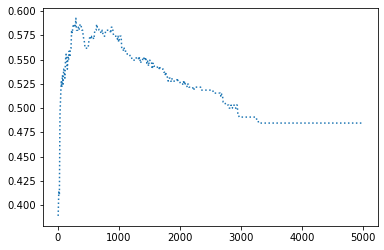

In [36]:
# Strategy 13: Naive Bayes Model on headline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

x_values = []
accuracy_scores = []
max_feat_num = 0
max_acc_score = 0

for x in range(1, 500):
    feat_num = x*10

    # Load in tfidf
    tfidf = TfidfVectorizer(max_features=feat_num)
    x_values.append(feat_num)

    # Create variables from gv_df to train_test_split
    X_hl = gv_df['headline'].astype(pd.StringDtype())
    X_hl = tfidf.fit_transform(X_hl.values.astype('U'))
    y = gv_df['Q3 Theme1']

    # Split training set into training and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(
            X_hl,
            y,
            test_size=0.25,
            random_state=0
        )

    nb = MultinomialNB().fit(X_train, Y_train)
    nb_hl_y_preds = nb.predict(X_test)
    acc_score = accuracy_score(Y_test, nb_hl_y_preds)
    accuracy_scores.append(acc_score)
    if (acc_score > max_acc_score):
        max_acc_score = acc_score
        max_feat_num = feat_num
    
plt.plot(x_values, accuracy_scores, linestyle = 'dotted')

print("Accuracy Score on NB headline testing set = ", accuracy_score(Y_test, nb_hl_y_preds))
print("Max Accuracy Score on Naive Bayes headline data = ", max_acc_score, " at max features = ",  max_feat_num)
nb_hl_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':nb_hl_y_preds})

Accuracy Score on NB headline testing set =  0.404320987654321
Max Accuracy Score on Naive Bayes headline data =  0.5339506172839507  at max features =  1010


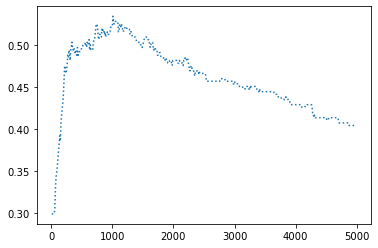

In [37]:
# Strategy 14: Naive Bayes Model on body

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

x_values = []
accuracy_scores = []
max_feat_num = 0
max_acc_score = 0

for x in range(1, 500):
    feat_num = x*10

    # Load in tfidf
    tfidf = TfidfVectorizer(max_features=feat_num)
    x_values.append(feat_num)

    # Create variables from gv_df to train_test_split
    X_body = gv_df['body'].astype(pd.StringDtype())
    X_body = tfidf.fit_transform(X_body.values.astype('U'))
    y = gv_df['Q3 Theme1']

    # Split training set into training and testing set
    X_train, X_test, Y_train, Y_test = train_test_split(
            X_body,
            y,
            test_size=0.25,
            random_state=0
        )

    nb = MultinomialNB().fit(X_train, Y_train)
    nb_body_y_preds = nb.predict(X_test)
    acc_score = accuracy_score(Y_test, nb_body_y_preds)
    accuracy_scores.append(acc_score)
    if (acc_score > max_acc_score):
        max_acc_score = acc_score
        max_feat_num = feat_num
    
plt.plot(x_values, accuracy_scores, linestyle = 'dotted')

print("Accuracy Score on NB headline testing set = ", accuracy_score(Y_test, nb_body_y_preds))
print("Max Accuracy Score on Naive Bayes headline data = ", max_acc_score, " at max features = ",  max_feat_num)
nb_body_results = pd.DataFrame({'Y_test':Y_test, 'y_preds':nb_body_y_preds})

In [38]:
kf = KFold(n_splits=4)


In [39]:
X = gv_df.drop(columns=["Q3 Theme1"], axis = 1)
Y = gv_df["Q3 Theme1"]


kf.get_n_splits(X)



4

In [40]:
print(kf)



KFold(n_splits=4, random_state=None, shuffle=False)


In [41]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 324  325  326  327  328  329  330  331  332  333  334  335  336  337
  338  339  340  341  342  343  344  345  346  347  348  349  350  351
  352  353  354  355  356  357  358  359  360  361  362  363  364  365
  366  367  368  369  370  371  372  373  374  375  376  377  378  379
  380  381  382  383  384  385  386  387  388  389  390  391  392  393
  394  395  396  397  398  399  400  401  402  403  404  405  406  407
  408  409  410  411  412  413  414  415  416  417  418  419  420  421
  422  423  424  425  426  427  428  429  430  431  432  433  434  435
  436  437  438  439  440  441  442  443  444  445  446  447  448  449
  450  451  452  453  454  455  456  457  458  459  460  461  462  463
  464  465  466  467  468  469  470  471  472  473  474  475  476  477
  478  479  480  481  482  483  484  485  486  487  488  489  490  491
  492  493  494  495  496  497  498  499  500  501  502  503  504  505
  506  507  508  509  510  511  512  513  514  515  516  517  518  519

KeyError: "None of [Int64Index([ 324,  325,  326,  327,  328,  329,  330,  331,  332,  333,\n            ...\n            1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294],\n           dtype='int64', length=971)] are in the [columns]"